# Forest fires in Algeria

## Introduction:

Forest fires are unplanned and uncontrolled fires in areas of combustible vegetation. They can be caused by a multitude of factors, including natural factors like hot conditions, volcanic eruptions, and dry vegetation. Factors like discarded cigarettes, human negligence, and arson also contribute to them. These fires can have devastating effects on the environment, wildlife, infrastructure, and the physical and mental health of humans. 

Prediction is crucial for the prevention and management of these disasters. Estimates of the magnitude and extent of forest fires can help indicate the measures needed to prevent the loss of human & animal life and to protect the infrastructure in the area. It can also help with efficient response management, resource allocation, and the control of smoke pollution. 

In this notebook, we will explore a data set and determine if we can predict a forest fire based on environmental factors like temperature, humidity, rainfall, etc.

## Data Description and EDA

### Background information on the dataset

The dataset includes 244 instances that cover forest fires across two regions of Algeria (Bjaia and Sidi Belabbas regions). There are 122 readings from each region, but due to one NaN value, one reading was removed (so total values = 243). The data collection period spanned over 4 months (June 2012 to September 2012).

The dataset includes 11 attribues and 1 output attribue ("Target")
The 243 instances have been classified into "fire" and "not fire" classes.

Attribute Information:
* Day : day of the month 
* Month : month of the year
* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
* RH : Relative Humidity in % - 21 to 90
* Ws : Wind speed in km/h - 6 to 29
* Rain: total day in mm - 0 to 16.8
* Fine Fuel Moisture Code (FFMC) - index from the FWI system: 28.6 to 92.5
* Duff Moisture Code (DMC) - index from the FWI system: 1.1 to 65.9
* Drought Code (DC) - index from the FWI system: 7 to 220.4
* Initial Spread Index (ISI) - index from the FWI system: 0 to 18.5
* Buildup Index (BUI): index from the FWI system - 1.1 to 68
* Fire Weather Index (FWI): Index - 0 to 31.1
* Target : two classes, "Fire" and "not Fire"

The 'Year' column was removed from the dataset since it stores the same value for all observations (2012).

**Import statements for libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as sms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

**Loading and exploring the data**

In [8]:
pd.read_csv('ForestFire.csv')

,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,notfire
0,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
1,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
2,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
3,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire
4,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
238,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire
239,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire
240,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire


**Since there is no headings in the dataset to identify each column, we add them to the top for readability:**

In [10]:
column_labels = ['Day', 'Month', 'Temp', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Target']

df = pd.read_csv('ForestFire.csv', names = column_labels)

In [11]:
df.head()

,Day,Month,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire


In [12]:
df.tail()

,Day,Month,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire
242,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,notfire


In [13]:
df.shape

(243, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     243 non-null    int64  
 1   Month   243 non-null    int64  
 2   Temp    243 non-null    int64  
 3   RH      243 non-null    int64  
 4   Ws      243 non-null    int64  
 5   Rain    243 non-null    float64
 6   FFMC    243 non-null    float64
 7   DMC     243 non-null    float64
 8   DC      243 non-null    float64
 9   ISI     243 non-null    float64
 10  BUI     243 non-null    float64
 11  FWI     243 non-null    float64
 12  Target  243 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 24.8+ KB


* From this, we can see that there are 243 rows (242 observations recorded since 1 row contains the labels)
* 7 columns in this data frame contain floating points, 5 of them store ints and 1 column stores other objects.

**Just to confirm there is no null values in the dataset:**

In [17]:
df.isnull().sum()

Day       0
Month     0
Temp      0
RH        0
Ws        0
Rain      0
FFMC      0
DMC       0
DC        0
ISI       0
BUI       0
FWI       0
Target    0
dtype: int64

In [159]:
#Print out a formatted string with number of unique values in each column
print('Number of unique values in each column:')
for feature in column_labels:
    unique_vals = df[feature].unique()
    count_vals = len(unique_vals)
    print (f'{feature} : {count_vals} values')

Number of unique values in each column:
Day : 31 values
Month : 4 values
Temp : 19 values
RH : 62 values
Ws : 18 values
Rain : 39 values
FFMC : 173 values
DMC : 165 values
DC : 197 values
ISI : 106 values
BUI : 173 values
FWI : 125 values
Target : 2 values


**For easier data processing, we're going to replace 'fire' with 1 and 'notfire' with 0 in the 'Target' column**

(There is only 2 unique values in the Target column, confirmed above)

In [20]:
df['Target'] = df['Target'].replace({'notfire' : 0, 'fire' : 1})
pd.set_option('future.no_silent_downcasting', True) #statement to put in from python warning

/var/folders/bf/mm6k7zsn3bbf0lhv0l3pj18h0000gn/T/ipykernel_1069/2923481208.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['Target'].replace({'notfire' : 0, 'fire' : 1})


In [21]:
df.tail()

,Day,Month,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
242,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


**Overview of the summary statistics:**

In [23]:
df.describe()

,Day,Month,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786
std,8.842552,1.114793,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


**Boxplot to visualize the distribution of data**

<Axes: >

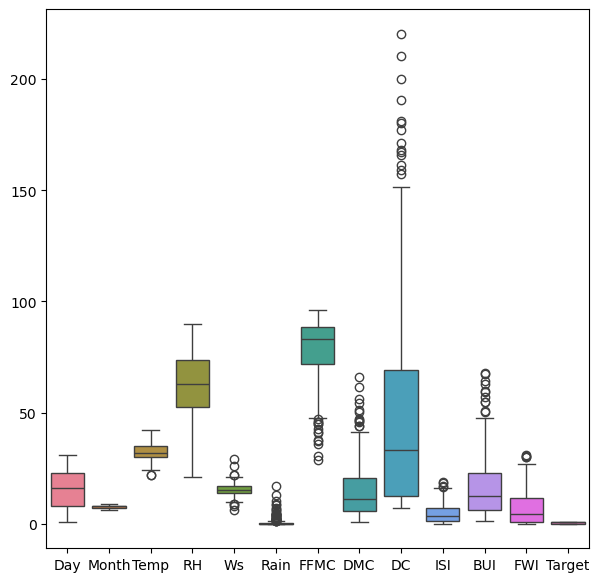

In [25]:
plt.figure(figsize = (7,7))
sns.boxplot(data=df)

**Now we're going to visualize & explore the correlation between various features**

**Histograms for all features of the dataframe:**

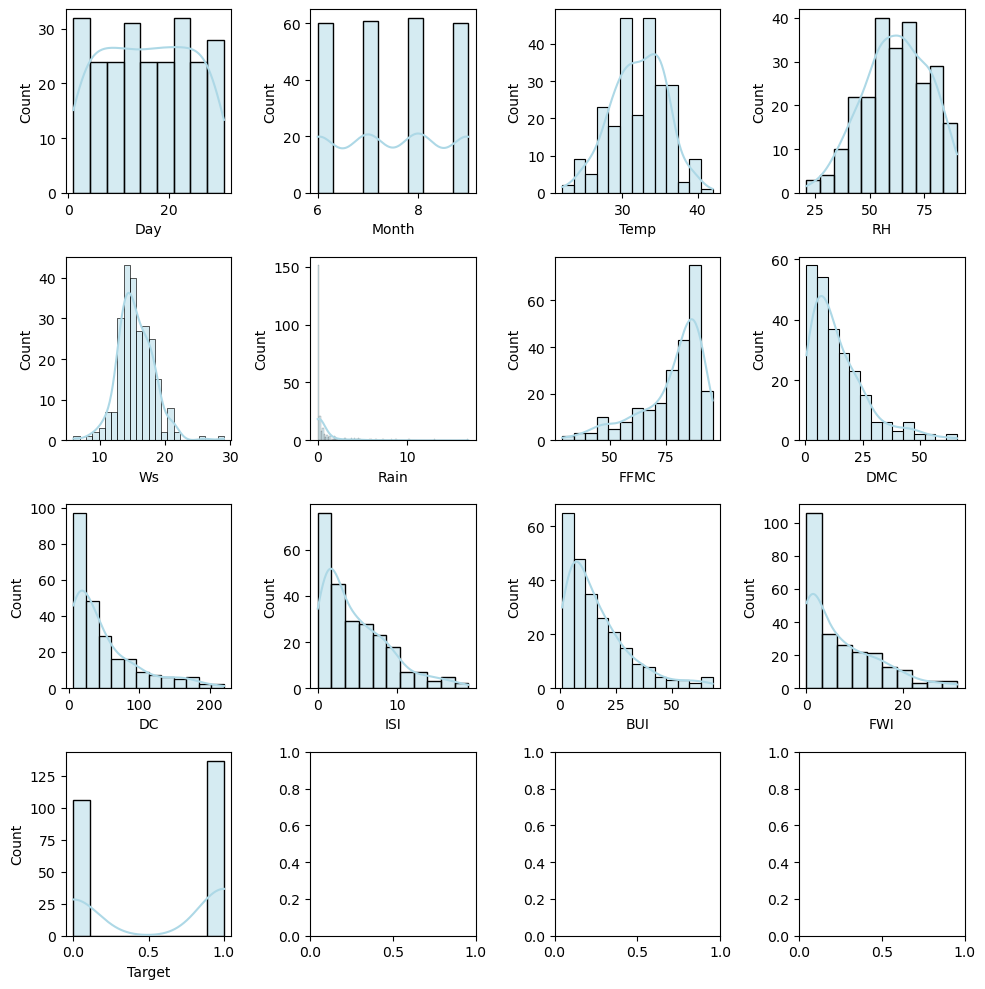

In [210]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten() #flatten the axes for easier indexing

for i, feature in enumerate(df.columns): # Loop through each column in the df and plot its histogram
    sns.histplot(df[feature], kde=True, ax=axes[i], color = 'lightblue')

plt.tight_layout() #Prevent any overlap when displaying
plt.show()

**From these graphs, we can make the following observations:**
* The temperature values range from ~22.5 to ~42.5 degrees Celsius, with the highest density at 30 to 34 degrees.
* The RH values span from 20 to 90, and the highest density is right below 60.
* The wind speed values range between 5-30, with 15 being the most high-density region.
* There is minimal to no rain in these regions, as shown in the graph.
* FFMC values range from 30-95, highest density from 85-90
* FWI, BUI, ISI, DC and DMC have very similar graphs, indicating similar distributions among them all.

**Check if the dataset is balanced or imbalanced:**

In [213]:
df['Target'].value_counts()

Target
1    137
0    106
Name: count, dtype: int64

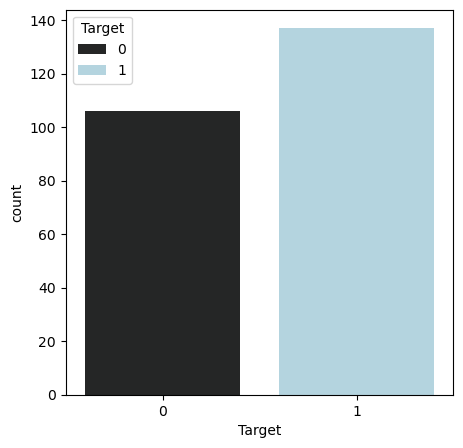

In [214]:
#Graphic representation
plt.figure(figsize=(5,5))
sns.countplot(x='Target', data = df, hue = 'Target', palette='dark:lightblue')
plt.show()

* We can say that our data is balanced since there is only a small difference between the occurrence of 1 & 0 (56% occurrence of fire(1) and 44% occurrence of notfire (0))

**Plotting a line graph to visualize the correlation between the month and temperature features:**

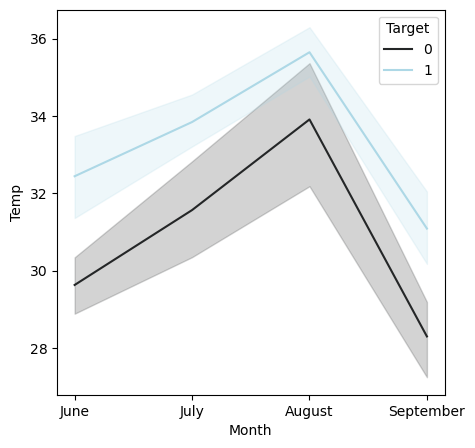

In [232]:
plt.figure(figsize=(5,5))
plot = sns.lineplot(data=df , x='Month', y='Temp', hue='Target', palette='dark:lightblue')
plot.set_xticks(np.arange(df['Month'].min(), df['Month'].max()+1, 1), #Ensures a suitable x-axis
                labels=['June', 'July', 'August', 'September'])
plt.show()

* It is clear that the temperatures are the highest during the month of August, and drop drasitically in September

**Now, to check the correlation between month and fire occurrence features:**

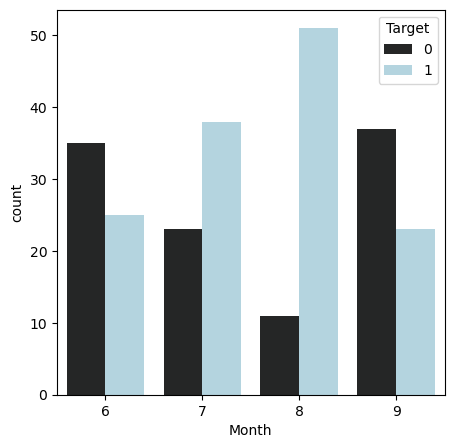

In [236]:
plt.figure(figsize=(5, 5))
sns.countplot(data= df , x='Month', hue='Target',  palette='dark:lightblue')
plt.show()

* It is visible that the most fires occurred in August (8), and the least in September (9). 

**Relationship between target and every other feature:**

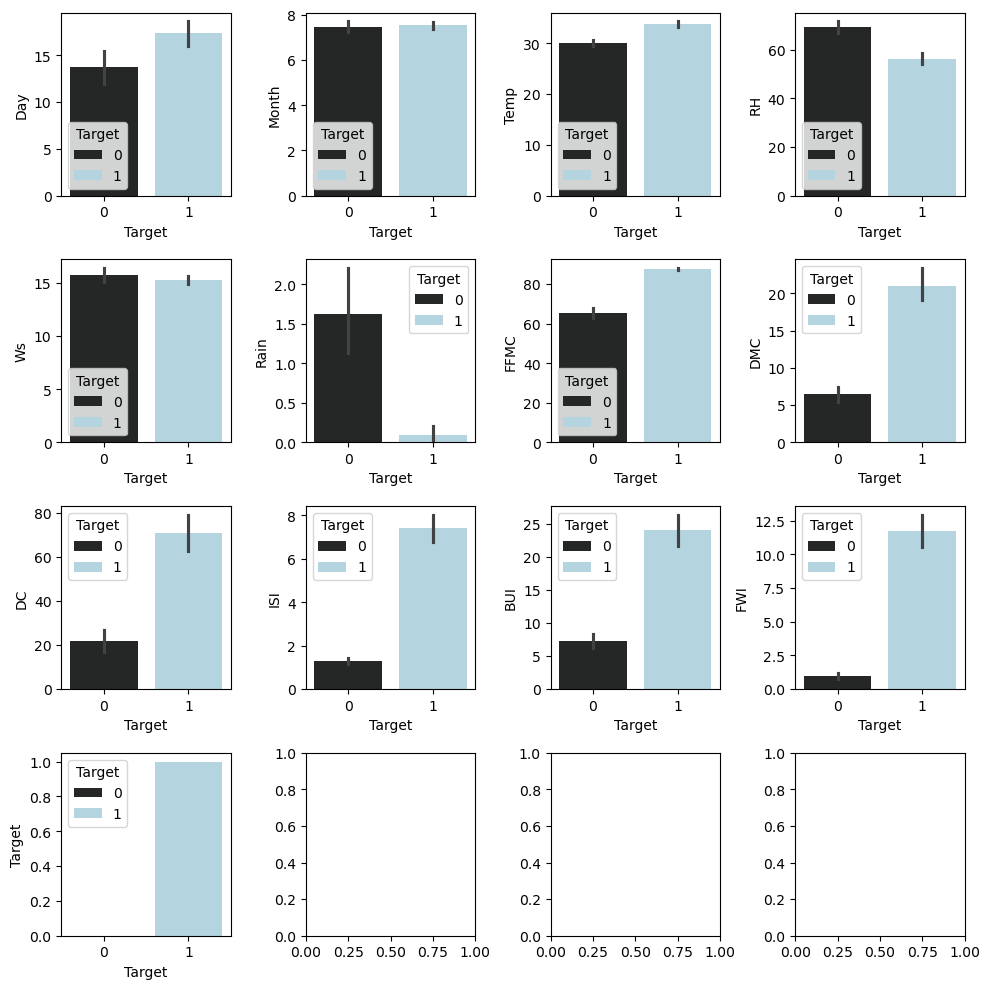

In [240]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for i, column in enumerate(column_labels): # Loop through each column in the df and plot it against the Target column
    sns.barplot(x='Target', y=column, data=df, hue='Target', ax=axes[i], palette='dark:lightblue')

plt.tight_layout() #Prevent any overlap when displaying
plt.show()

**Correlation between all variable:**

In [242]:
df.corr()

,Day,Month,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
Day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840
Month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004
Temp,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197


**Visualizing it as a heatmap:**

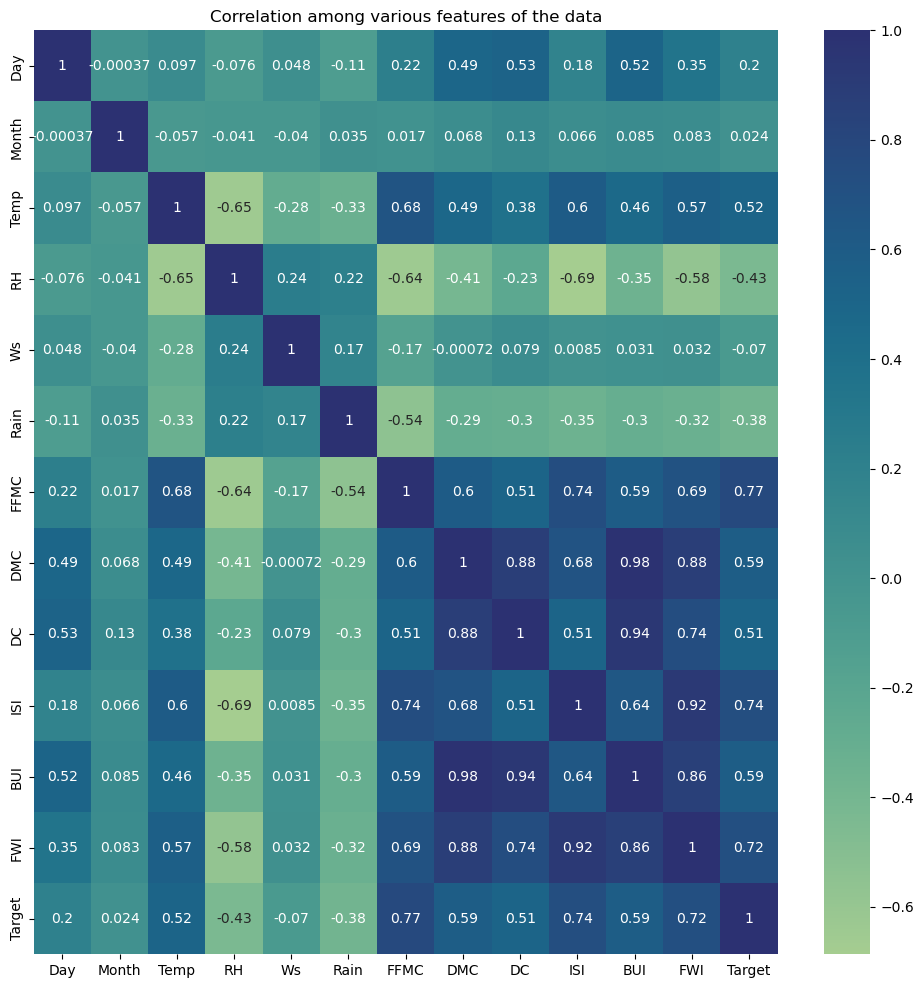

In [244]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot= True, cmap="crest")
plt.title('Correlation among various features of the data')
plt.show()

**The conclusions we can make based on the heatmap and the correlation:**
* Temperature is somewhat related to all the features.
* The windspeed is not related to any of the features.
* RH and rain are both are very negatively related to FWI, BUI, ISI, DC, DMC and FFMC. 
* On the other hand, FWI, BUI, ISI, DC, DMC and FFMC are all related to each other

## Building the Model: 

We're going to use decision tree and logistic regression algorithms for the model and compare them using various metrics.

In [251]:
df.columns

Index(['Day', 'Month', 'Temp', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Target'],
      dtype='object')

* As stated above, we're going to build a model that is able to predict whether a forest fire will occur in a region in Algeria, based on factors including Temp, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI.
* Our inputs are going to be all the variables except Target, which is going to be our output variable.

In [256]:
# Seperate the output and input variables
x = df[['Day', 'Month', 'Temp', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI']]
y = df['Target']

In [75]:
#Creating test and train using 80/20 split
x_train, x_test, y_train, y_test = sms.train_test_split(x, y, test_size = 0.2, train_size= 0.8, random_state = 42)

**Scaling the data:**

In [78]:
x_scaled_train = StandardScaler().fit_transform(x_train)
x_scaled_test = StandardScaler().fit_transform(x_test)

**Scatter matrixes to show the train and test**

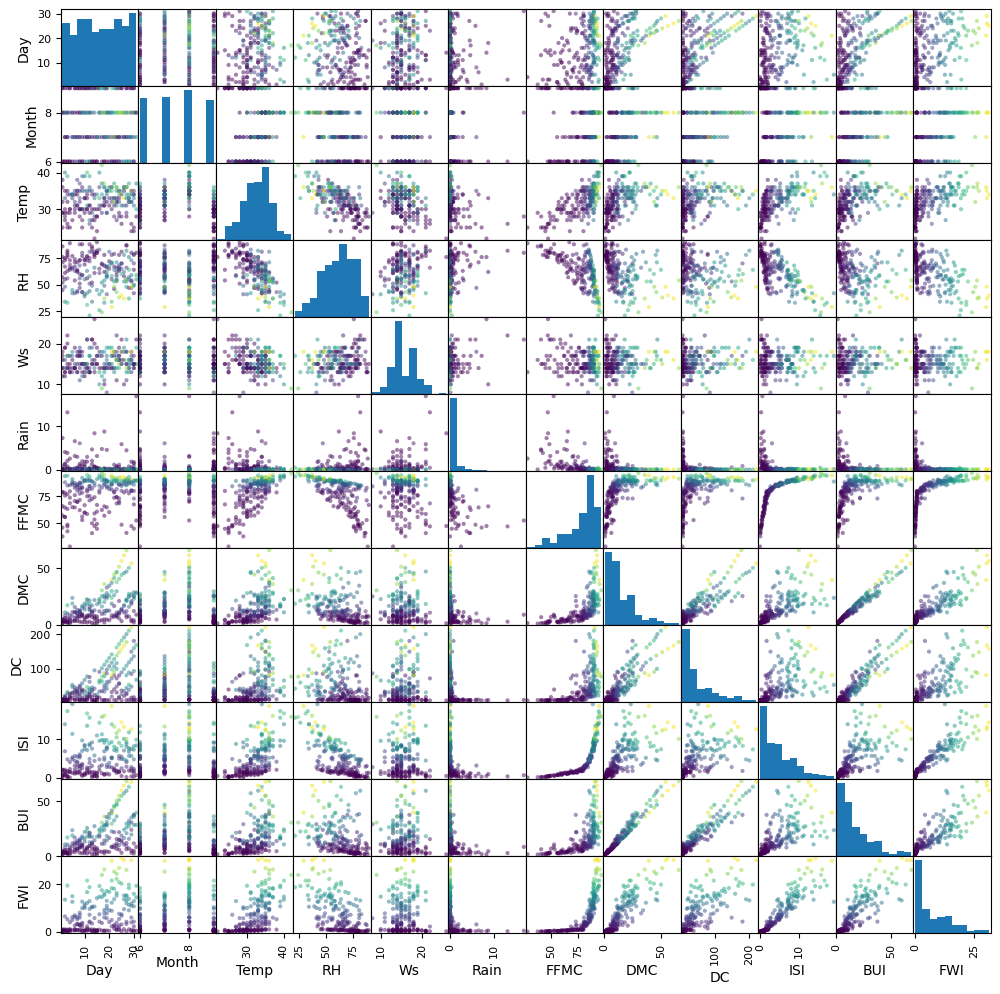

In [81]:
scatter_matrix_train = pd.plotting.scatter_matrix(x_train, figsize=(12, 12), c = x_train['FWI'])

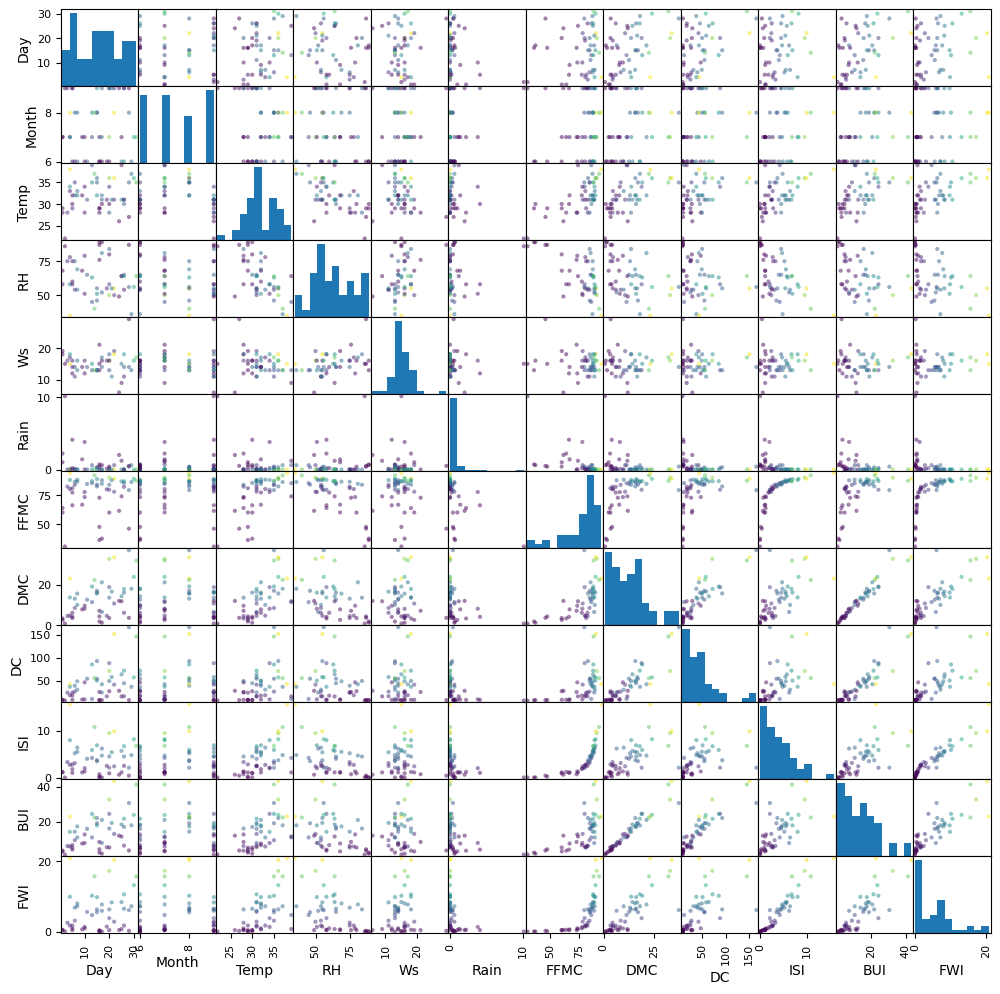

In [82]:
scatter_matrix_test = pd.plotting.scatter_matrix(x_test, figsize=(12, 12), c = x_test['FWI'])

### Decsion tree classifier: 

**To ensure that our decision tree doesn't over/underfit, we're going to find the suitable hyperparameters:**

In [258]:
#In testing building models, there was alot of overfitting occuring. So, we're going to find the best hyperparameters for out model
param_grid = {'max_depth': range(1, 30), 'min_samples_split': [2, 5, 10, 20, 50], #most common values
    'min_samples_leaf': [1, 3, 5, 10, 20]}

decision_tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(x_train, y_train)

print(f"max_depth: {grid_search.best_params_['max_depth']}")
print(f"split: {grid_search.best_params_['min_samples_split']}")
print(f"leaf: {grid_search.best_params_['min_samples_leaf']}")

max_depth: 3
split: 2
leaf: 1


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [306]:
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state = 42)

fit_tree = decision_tree.fit(x_train, y_train)

exp_tree = tree.export_text(fit_tree)
print(exp_tree)

|--- feature_6 <= 80.10
|   |--- class: 0
|--- feature_6 >  80.10
|   |--- feature_9 <= 2.65
|   |   |--- feature_3 <= 77.00
|   |   |   |--- class: 0
|   |   |--- feature_3 >  77.00
|   |   |   |--- class: 1
|   |--- feature_9 >  2.65
|   |   |--- feature_6 <= 82.05
|   |   |   |--- feature_5 <= 0.05
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  0.05
|   |   |   |   |--- class: 1
|   |   |--- feature_6 >  82.05
|   |   |   |--- class: 1



In [286]:
tree_pred = fit_tree.predict(x_test)
print(tree_pred)

[1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 0 0 1 0 1 0 1 1 1 0 1]


**Decision Tree visualization:**

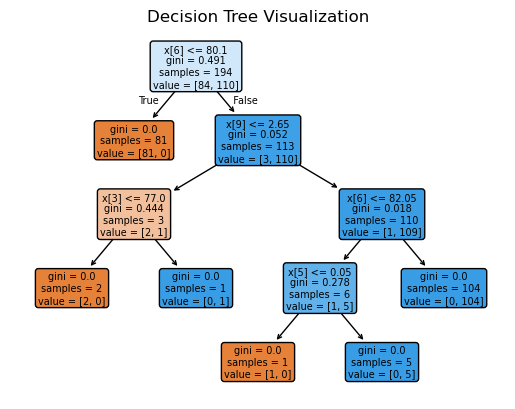

In [289]:
tree.plot_tree(decision_tree, fontsize = 7, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

**Confusion Matrix:**

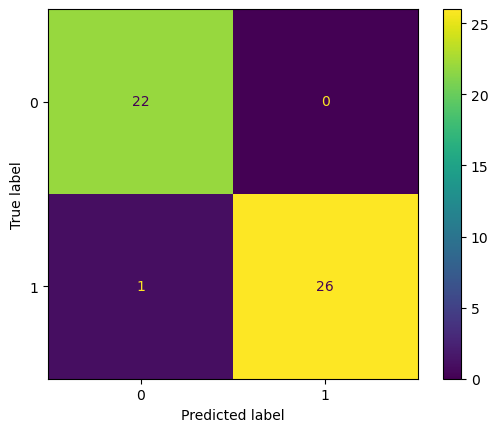

In [292]:
tree_matrix = metrics.confusion_matrix(y_test, tree_pred)
ConfusionMatrixDisplay(tree_matrix).plot()
plt.show()

**Plotting the ROC-AUC:**

In [295]:
fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(y_test, decision_tree.predict_proba(x_test)[:, 1])

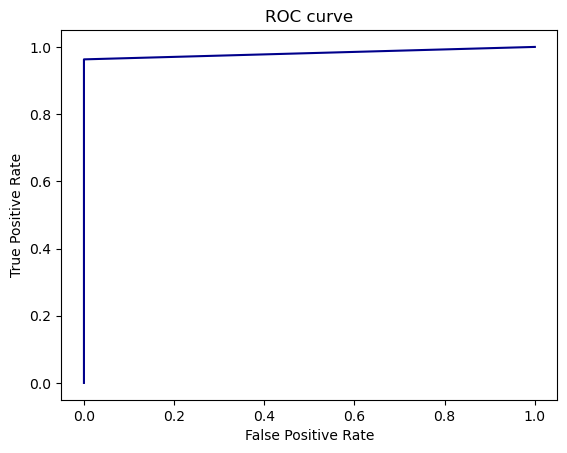

In [297]:
def tree_roc_curve(fpr_tree, tpr_tree):
    plt.plot(fpr_tree, tpr_tree, label='ROC', color = 'darkBlue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
tree_roc_curve(fpr_tree, tpr_tree)
plt.show()

**Calculating the accuracy, auc and precision scores:**

In [300]:
dt_acc = metrics.accuracy_score(y_test, tree_pred)
dt_acc

0.9795918367346939

In [302]:
dt_prec = metrics.precision_score(y_test, tree_pred)
dt_prec

1.0

In [304]:
tree_auc = metrics.roc_auc_score(y_test, decision_tree.predict_proba(x_test)[:, 1] )
tree_auc

0.9814814814814814

### Logistic regression model

In [101]:
log = LogisticRegression()

In [102]:
log.fit(x_scaled_train, y_train)

LogisticRegression()

In [103]:
log_pred = log.predict(x_scaled_test)
log_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1])

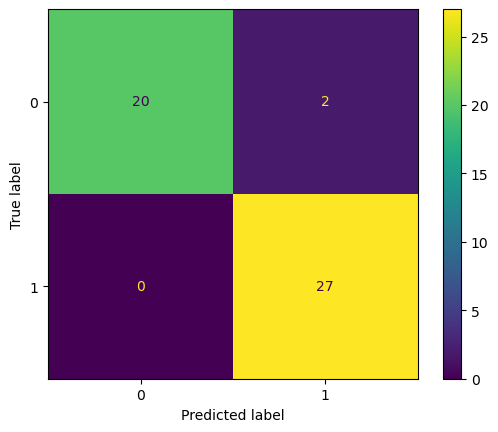

In [104]:
log_matrix = metrics.confusion_matrix(y_test, log_pred)
ConfusionMatrixDisplay(log_matrix).plot()
plt.show()

**Calculating the accuracy, auc and precision scores:**

In [106]:
log_acc = metrics.accuracy_score(y_test, log_pred)
log_acc

0.9591836734693877

In [107]:
log_prec = metrics.precision_score(y_test, log_pred)
log_prec

0.9310344827586207

In [108]:
log_auc = metrics.roc_auc_score(y_test, log.predict_proba(x_scaled_test)[:, 1])
log_auc

0.9932659932659933

In [110]:
fpr_log, tpr_log, thresholds_log = metrics.roc_curve(y_test, log.predict_proba(x_scaled_test)[:, 1])

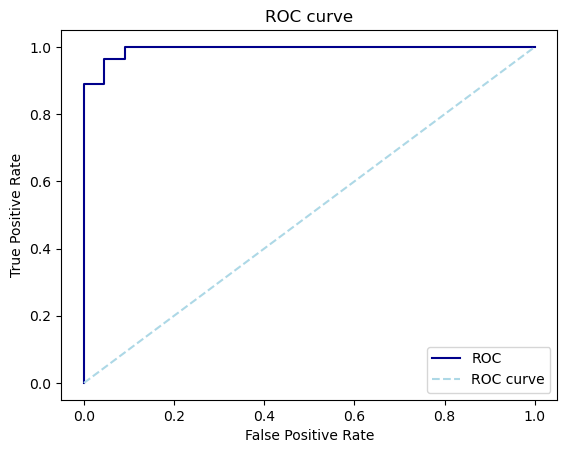

In [111]:
def plot_roc_curve(fpr_log, tpr_log):
    plt.plot(fpr_log, tpr_log, label='ROC', color = 'darkBlue')
    plt.plot([0,1],[0,1], linestyle = '--', color = 'lightBlue', label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend()
plot_roc_curve(fpr_log, tpr_log)
plt.show()

## Discussion of Results

**Displaying and comparing the metrics**

In [114]:
tree_matrix

array([[22,  0],
       [ 1, 26]])

The confusion matrix for the decision tree shows that our model correctly detected 22 positive cases, and 26 negative cases.
Although it missed 1 positive case, the accuracy of our decision tree is very high 

In [116]:
log_matrix

array([[20,  2],
       [ 0, 27]])

On the other hand, the confusion matrix for the logistic regression model shows 20 true positive cases and 27 true negative cases. Even though it didn't detect any false negatives, there were 2 cases where it classified it as positive, when it was actually negative. This reduced it's accuracy, and compared to the decision tree, its accuracy is lower. 

In [308]:
acc = list() #Initilaize a list to store the accuracy scores
prec = list() #Initilaize a list to store the precicion scores
auc = list() #Initilaize a list to store the roc-auc

#Add the suitable metrics to the suitable lists, for both models
acc.append(dt_acc) 
acc.append(log_acc)

prec.append(dt_prec)
prec.append(log_prec)

auc.append(tree_auc)
auc.append(log_auc)

In [310]:
#Display the metrics as a dataframe
dfscores = pd.DataFrame({'Accuracy Score' : acc, 'Precision Score' : prec, 'AUC' : auc}, index = ["Decision Tree", "Logistic Regression"])
dfscores

,Accuracy Score,Precision Score,AUC
Decision Tree,0.979592,1.000000,0.981481
Logistic Regression,0.959184,0.931034,0.993266


From these metrics, we can tell that all our models seem to be working well as they have high evaluation metrics.
However, they have slight differences in their metrics, allowing for a more detailed comparison:

- As discussed with the confusion matrices, the decision tree outperforms the logistic regression model in terms of accuracy, with a 2.04% higher accuracy.

- The decision tree has perfect precision, meaning it had no false positives, whereas logistic regression has 93.10% precision. 

- However, Logistic regression (99.33%) performed better than the decision tree (98.15%) in the AUC, with a 1.18% difference, indicating slightly better overall classification ability.

## Conclusion

The Logistic Regression model is better at distinguishing between classes. Compared to decision trees, it is less prone to overfitting, and it is also more scalable, which is particularly useful when we’re dealing with a large dataset. However, logistic regression assumes that there is a linear relationship, which can limit its performance. 

Furthermore, if we have a dataset with null values, it may not be suitable since it assumes that all features have non-zero values, so it can’t handle sparse data as well as decision trees. 

The Decision Tree model has a higher accuracy than the Logistic Regression model (by 2.04%), and perfect precision (100%), meaning it does not produce false positives. This makes it highly effective when false positives must be minimized. Decision trees also provide a clear, visual representation of decision-making, which is key for understanding feature importance. 

Moreover, unlike Logistic Regression, decision trees can interpret complex, non-linear relationships between features and the target variable.  However, their high accuracy and perfect precision has caused concerns about overfitting, and so it may not be completely suitable when dealing with unseen data. Although strong, the Decision Tree has a lower AUC than Logistic Regression, indicating it may not separate classes as well when varying classification thresholds.

## References

* https://pandas.pydata.org/docs/index.html

* https://scikit-learn.org/stable/

* https://seaborn.pydata.org/

* https://www.dryad.net/post/how-do-wildfires-start#viewer-o1ej4483962

* https://www.ouranos.ca/en/climate-phenomena/forest-fires-impacts#:~:text=Forest%20fires%20have%20a%20significant%20impact%20on%20infrastructure%2C%20including%20roads,effects%20such%20as%20power%20failures.

* https://newsroom.carleton.ca/story/forest-fires-planning-modelling-factors/

* https://www.statology.org/plot-roc-curve-python/

* https://gustavwillig.medium.com/decision-tree-vs-logistic-regression-1a40c58307d0

* O'Reilly Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition (Book)

* O'Reilly Introduction to machine learning with python a guide for data scientists (Book)